## 11. 정규모집단에서의 추론
- 표본의 크기가 작을 때

## 11.1 서론

- 표본의 크기가 큰 경우에는 중심극한정리에 의해 표본평균의 분포가 정규분포가 된다. 표본의 크기가 작은 경우에는 모집단의 분포에 많은 영향을 받으므로, 모든 모집단에 대하여 적용할 수 있는 일반적인 통계적 추론방법을 제시할 수 없다

- t 분포를 이용하여 모집단의 분포가 정규분포를 따르가, 모집단의 표준편차가 알려져 있을 때 적용할 수 있는 모평균에 대한 추정과 검정

## 11.2 t 분포
- 모집단의 분포가 $N(\mu, \sigma^2)$일 때, 크기가 n 인 표본의 평균 $\bar{X}$의 분포는 정확하게 $N(\mu, \sigma^2/n)$
$$ \frac{\bar{X}-\mu}{\sigma /\sqrt{n}} \sim N(0,1)$$
- 일반적으로 $\sigma$는 미지수 이므로, 표본의 크기가 큰 경우에는, 표본의 표준편차 s로 대체하여도 분포가 큰 영향을 받지 않으나, 표본의 크기가 작은 경우에는 표준정규분포와는 달라지고, 변화된 분포를 t분포라고 함
- 정규모집단 $N(\mu, \sigma^2)$로부터 추출된 표본 평균과 표본 분산을 $\bar{X}=\frac{\sum X_i}{n},\quad s^2=\frac{\sum(X_i-\bar{X})^2}{n-1}$일때, 표준화된 확률변수 $$ t=\frac{\bar{X}-\mu}{s/\sqrt{n}}$$는 자유도가 (n-1)인 t분포를 따르고 **t(n-1)**로 표현
- 0을 중심으로 대칭하는 종 모양 분포이나, 양 꼬리 부분에 상대적으로 많은 확률 존재, 자유도가 증가하며 꼬리부분의 확률이 중심으로 모여 표준정규분포에 가까워짐

327

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# example 9
path = '../data/pstat/예제, 연습문제/'
bacteria = pd.DataFrame(np.array([175,190,215,198,184,207,210,193,196,180]))#pd.read_excel(path + 'ch11.xlsx',sheet_name='예제4',header=None)
bacteria.head()

,0
0,175
1,190
2,215
3,198
4,184


In [3]:
x_bar = np.mean(bacteria)
var = np.var(bacteria, ddof=1)
s = np.std(bacteria, ddof=1)
n = len(bacteria)
se = stats.sem(bacteria)

alpha = 0.1
t_alpha = stats.t.ppf(1-alpha/2, n-1)
interval = t_alpha * se
ci = [x_bar-interval, x_bar+interval]
ci

[0    187.183813
 dtype: float64,
 0    202.416187
 dtype: float64]

In [4]:
t_val = (x_bar - 200) / se
p_val = stats.t.cdf(t_val, df=n-1)
p_val

array([0.12113885])

In [5]:
# example 1
alpha = 0.1
print(stats.t.ppf(1-alpha,df=2), stats.t.ppf(1-alpha,df=10))

1.8856180831641507 1.3721836411102863


In [6]:
# example 2
alpha = 0.1
stats.t.ppf(1-alpha/2, df=9)

1.8331129326536335

In [7]:
# prob 2.2
# 1   
print(stats.t.ppf(1-0.05/2, df=27))

# 2
print(stats.t.ppf(1-0.1, df=20))

# 3
print(stats.t.ppf(1-0.05, df=17))

# 4
print(stats.t.ppf(0.05, df=19))

2.0518305164802833
1.3253407069850462
1.7396067260750672
-1.7291328115213678


In [8]:
# prob 2.4
# 1
print(stats.t.cdf(-1.740, df=17))

# 2
print(stats.t.cdf(3.143,df=6))

# 3
print(stats.t.cdf(1.330,df=10) - stats.t.cdf(-1.330, df=18))

# 4
print(stats.t.cdf(2.764, df=10)-stats.t.cdf(-1.372, df=10))

0.04996462178926353
0.9900042102388948
0.7934093703754337
0.8899762848394801


In [9]:
# prob 2.6
print(stats.t.ppf(1-0.05, df=5))
print(stats.t.ppf(1-0.05, df=10))
print(stats.t.ppf(1-0.05, df=15))
print(stats.t.ppf(1-0.05, df=20))
print(stats.t.ppf(1-0.05, df=25))

2.015048372669157
1.8124611228107335
1.7530503556925547
1.7247182429207857
1.7081407612518986


In [10]:
# prob 2.8
# 1
print(stats.t.ppf(1-0.03, df=5))

# 2
print(stats.t.ppf(1-0.016, df=9))

# 3
print(stats.t.ppf(0.004, df=12))

# 4
print(stats.t.ppf(1-0.03/2, df=5))

# 5
print(stats.t.ppf(0.96, df=21))

2.421584703654081
2.534466464830803
-3.1746674431912982
3.0028749738417986
1.8396511415069043


## 11.3 모평균에 대한 추론

- 표본의 크기가 작아도 모평균 점 추정량으로 표본평균을 많이 사용.
- 구간추정이나 검정의 경우 표본의 크기가 작을 때는 정규분포를 그대로 사용할 수 없는 경우가 많음
    - 표본의 크기가 작을 때는, 모집단이 정규분포를 따르고 모분산이 알려져 있을 때만 정규분포 사용 가능
    - 모집단에 대한 정규분포은 적절하더라도 모분산이 알려져 있지 않은 경우, t분포를 이용
    
### 구간추정
- 정규모집단에서 추출한 표본으로부터 계산된 통계량 $\frac{\bar{X}-\mu}{s\sqrt{n}}$은 자유도가 n-1인 t분포를 따른다.
- 따라서 상위$\alpha/2$의 확률을 주는 값 $t_{\alpha/2}(n-1)$에 대하여$$P(-t_{\alpha/2}(n-1)<\frac{\bar{X}-\mu}{s\sqrt{n}}<t_{\alpha/2}(n-1))=1-\alpha \\ \therefore P(\bar{X}-t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}} < \mu < \bar{X}+t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}})=1-\alpha$$
- 정규모집단으로부터 표본을 추출할 때, $\mu$에 대한 $100(1-\alpha)$%의 신뢰구간은 $$(\bar{X}-t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}},\quad \bar{X}+t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}})\\ \bar{X} \pm t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}}$$
    - $\sigma$가 알려져, s를 $\sigma$로 대체한다면, t분포 대신 정규분포를 이용하고, 신뢰구간의 길이는 $2\times z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$
    - $\sigma$가 알려져 있지 않은 경우, s로 추정함으로써, 신뢰길이가 달라질 뿐 아니라, $z_{\alpha/2}$ 대신 그보다 큰 $t_{\alpha/2}(n-1)$를 사용함으로써 신뢰구간의 길이가 길어지게 된다.
    - n이 커져갈 수록, $\sigma$도 s에 의해 더 정확하게 추정되고, $t_{\alpha/2}(n-1)$도 $z_{\alpha/2}$에 가까워져서 두 경우 신뢰구간의 길이는 비슷하게 됨
- **실제로 모집단이 정규분포를 따라야한다는 가정이 있으므로, 정규확률그림을 그려 판단 필요**

In [11]:
# example 3
# 1
mu = 39.3
s = 2.6
n = 15
alpha = 0.1

t_alpha = stats.t.ppf(1-alpha/2, n-1)
interval = t_alpha * s / np.sqrt(n)
interval

1.1823976360494726

In [12]:
# 2
ci = [mu-interval, mu+interval]
ci

[38.117602363950525, 40.48239763604947]

### 가설검정
- 모집단이 정규분포를 따르고 모분산이 알려져 있지 않은 경우, $\frac{\bar{X}-\mu_0}{s/\sqrt{n}}$는 정규분포를 따르지 않고, 자유도가 n-1인 t 분포를 따르게 된다. **검정통계량이 t분포를 따르는 경우 t-검정**
- 모평균 $\mu$에 대한 검정
$$t=\frac{\bar{X}-\mu_0}{s/\sqrt{n}}$$
    - 검정통계량은 $H_0$이 맞을 때 자유도가 (n-1)인 t분포를 따른다. 각 대립가설에 대한 유의수준 $\alpha$를 갖는 기각역은 다음과 같다.
$$H_1:\mu<\mu_0일\ 때\quad R:t\leq-t_{\alpha}(n-1) \\
    H_1:\mu>\mu_0일\ 때\quad R:t\geq-t_{\alpha}(n-1) \\
    H_1:\mu\neq\mu_0일\ 때\quad R:|t|\geq-t_{\alpha/2}(n-1)$$
    
- t검정도 p값을 계산하는 것이 바람직    

In [13]:
# example 4

data = [175, 190, 215, 198, 184, 207, 210, 193, 196, 180]
mu = 200
n = len(data)
alpha = 0.05
s = np.std(data, ddof=1)

t = (np.mean(data) - mu) / (s/np.sqrt(n)); print(t)
t_alpha = stats.t.ppf(alpha, df=n-1); print(t_alpha)
p_value = stats.t.cdf(t, df=n-1); print(p_value)

-1.2515695604210733
-1.8331129326536337
0.12113884687382763


In [14]:
# prob 3.2

data = [12,16,15,20,17,11,18]
n = len(data)
s = np.std(data, ddof=1)
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)

ci = [np.mean(data)-interval, np.mean(data)+interval]
print(ci)

[12.605323495006326, 18.537533647850815]


In [15]:
# prob 3.4
# 1

data = [1.2, 0.8, 0.6, 1.1, 1.2, 0.9, 1.5, 0.9, 1.0]
mu = np.mean(data); print(mu)
s = np.std(data, ddof=1); print(s)

1.0222222222222221
0.2635231383473649


In [16]:
# 2
alpha = 0.02
t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(len(data))
ci = [mu-interval, mu+interval]
ci

[0.746166942082108, 1.2982775023623363]

In [17]:
# prob 3.6
mu = 0.38
s = 0.06
n = 25
alpha = 0.01

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)

ci = [mu-interval, mu+interval]
ci

[0.34643672594272634, 0.41356327405727367]

In [18]:
# prob 3.8
# 1
n = 18
alpha = 0.1
t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
# interval = t_alpha * s / np.sqrt(n)
mu = (146-122)/2 + 122; print(mu)
interval = (146-122)/2; print(interval)

134.0
12.0


In [19]:
# 2
s = interval * np.sqrt(n) / t_alpha
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)

ci = [mu-interval, mu+interval]
print(ci)

[119.44625830970392, 148.55374169029608]


In [20]:
# prob 3.10
n = 20
mu = 182
s = 2.3
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha, df=n-1) ; print(t_alpha)
t_val = -(181 - mu) / (s/np.sqrt(n)) ; print(t_val)

1.729132811521367
1.9444069369563393


In [21]:
stats.t.cdf(t_val, df=n-1)

0.966598744567122

In [22]:
# prob 3.12
mu_0 = 0.38
s = 0.06
n = 25
alpha = 0.05
mu = 0.35

t_alpha = stats.t.ppf(1-alpha/2, df=n-1); print(t_alpha)
t_val = -(mu - mu_0) / (s/np.sqrt(n)); print(t_val)
stats.t.cdf(t_val, df=n-1)

2.0638985616280205
2.500000000000002


0.9901729124417107

In [23]:
# prob 3.14
data = [3.5, 5.1, 5.0, 3.6, 4.8, 3.6, 4.7, 4.3, 4.2, 4.5, 4.9, 4.7, 4.8]
n = len(data)
s = np.std(data, ddof=1)
mu = np.mean(data)
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)

ci = [mu-interval, mu+interval]; ci

[4.101518243994926, 4.7754048329281495]

In [24]:
# prob 3.16
n = 19
mu = 72.7
s = 10.2
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)

ci = [mu-interval, mu+interval]; ci

[67.78375736899949, 77.61624263100052]

In [25]:
# prob 3.18
# 1
mu_0 = 5000
n = 27
mu = 5500
s = 1200

t = (mu - mu_0) / (s/np.sqrt(n))
p_val = stats.t.cdf(t, df=n-1) ; p_val

0.980128308985024

In [26]:
# 2
alpha = 0.02

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)

ci = [mu-interval, mu+interval]; ci

[4927.584961651284, 6072.415038348716]

In [27]:
# prob 3.20
# 1
cd = [21, 38, 12, 15, 14, 8]
zn = [140, 190, 130, 150, 160, 140]
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, len(cd)-1)
interval_cd = t_alpha * np.std(cd, ddof=1) / np.sqrt(len(cd))
interval_zn = t_alpha * np.std(zn, ddof=1) / np.sqrt(len(zn))

print(np.mean(cd)-interval_cd, np.mean(cd)+interval_cd)
print(np.mean(zn)-interval_zn, np.mean(zn)+interval_zn)

6.795093548095165 29.204906451904833
129.24047830367232 174.092855029661


In [28]:
# 2
mu = 12
s = np.std(zn, ddof=1)
n = len(zn)

t_val = (mu - np.mean(cd))/(s/np.sqrt(n))
stats.t.cdf(t_val, df=n-1)

0.2611053326750764

In [29]:
# prob 3.22
# 1
# H_0 : 해당 공장의 평균 접착력 수준은 500kg이다

# 2
# ???

# 3
# 표본집단이 정규분포
n = 15
mu = 510
mu_0 = 500
s = 23
alpha = 0.05

t_val = (mu-mu_0)/(s/np.sqrt(n))
stats.t.cdf(t_val, df=n-1)

0.9428226291408562

In [30]:
# 4
z_val = (mu-mu_0) / (23/np.sqrt(n))
stats.norm.cdf(z_val)

0.9539000626287104

In [31]:
# prob 3.24
# 1
# t(25-1) 분포

# 2
n = 25
mu = 30
s = np.sqrt(25)
alpha = 0.05

## 11.4 신뢰구간과 양측검정의 관계

- 구간추정의 과정과 양측검정의 과정이 비슷
    - $\mu$에 대한 $100(1-\alpha)$%의 신뢰구간 $$(\bar{X}-t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}},\ \bar{X}+t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}})$$
    - $H_0:\mu=\mu_0$에 대한 양측 검정에서의 기각역은 유의수준 $\alpha$일 때, $$R:|t|=|\frac{\bar{X}-\mu_0}{s/\sqrt{n}}|\geq t_{\alpha/2}(n-1) \\ 채택영역\ :\ \bar{X}-t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}}<\mu_0<\bar{X}+t_{\alpha/2}(n-1)\frac{s}{\sqrt{n}}$$
    - 따라서 $\mu_0$이 $100(1-\alpha)$% 신뢰구간에 포함되면, 가설 H0를 유의수준 $\alpha$로 양측검정 한다고 할 때, 검정통계량은 채택영역에 포함되어 기각할 수 없다. $\mu$에 대한 신뢰구간을 구하고 나면 $\mu_0$이 그 구간에 포함되는지에 따라 가설에 대한 결론을 얻을 수 있다. 이는 비율이나 표준편차에도 해당

> 모수 $\theta$에 대한 $100(1-\alpha)$%의 신뢰구간이 (L,U)로 구해졌을 때, 가설 $H_0:\theta=\theta_0$대 $H_1:\theta\neq\theta_0$에 대하여 유의수준 $\alpha$로 검정을 시행할 때 결론은 다음과 같다. $$\theta_0\in(L,U)\Leftrightarrow H_0을\ 기각할\ 수\ 없다.\\ \theta_0\notin(L,U)\Leftrightarrow H_0을\ 기각한다.$$

In [32]:
# prob 5
n = 9
x_bar = 8.3
s = 1.2
mu = 8.5
alpha = 0.05

t_val = (x_bar-mu)/(s/np.sqrt(n))
stats.t.cdf(t_val, df=n-1)

0.3152680377784888

In [33]:
t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha *s/np.sqrt(n)

print(x_bar-interval, x_bar+interval)

7.3775983459866525 9.22240165401335


In [34]:
# prob 4.2
# 1
alpha = 0.1
mu = 39
x_bar = (28.12+40.48)/2
interval = (40.48-28.12)/2

t_val = (mu-x_bar) / (s/np.sqrt(n))
# interval = t_alpha * s / np.sqrt(n)
# t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
# 

In [35]:
# prob 4.4
# 1
data = [1.8, 10.6, -1.2, 12.9, 15.1, -2.0, 6.25, 10.8]
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)
ci = [x_bar-interval, x_bar+interval]; ci

[1.2783732261218237, 12.284126773878176]

In [36]:
# 2
mu = 15

t_val = (mu - x_bar) / (s/np.sqrt(n))
stats.t.cdf(t_val, df=n-1)

0.9952117341379233

## 11.5 모표준편차에 대한 추론

- 모집단이 정규분포를 따른다는 가정하에서 모집단의 표준편차 추론
- **모집단이 정규분포를 따르지 않을 때, t분포를 이용한 모평균의 대한 추론보다 심각한 오류를 범할 가능성이 더 높다**
$$ s^2 = \frac{\sum(X_i-\bar{X})^2}{n-1}$$

- 점추정의 겨우 $sigma^2$의 추정량으로 $s^2$을 사용하고, 모표준펀차의 추정량으로 표본표준편차 s를 사용한다. 구간추정이나 검정은 $s^2$의 분포가 필요한데 그 분포는 $\chi^2$분포와 연관
> 정규모집단 $N(\mu,\sigma^2)$으로부터 임의추출된 표본이 $X_1, ..., X_n$일 때, $$\chi^2=\frac{\sum^{n}_{i=1}(X_i1-\bar{X})^2}{\sigma^2}$$은 자유도가 (n-1)인 $\chi^2$분포를 따르고, 이를 기호로 $\chi^2(n-1)$로서 표현한다.

- $\chi^2$분포는 확률밀도함수가 양수 쪽에만 퍼져있고 오른쪽에 긴 꼬리를 갖고 있는 비대칭형. 자유도가 클 수록 0으로부터 멀리 떨어져서 넓게 분포한다.
- $\chi^2_\alpha(\gamma)$ : 자유도 $\gamma$인 확률변수 $chi^2$에 대하여 $P[\chi^2\geq\chi^2_\alpha(\gamma)]=\alpha$를 만족시킨다. 하위값은 $\chi^2_{1-\alpha}(\gamma)$

In [37]:
# example 6
alpha = 0.05

print(stats.chi2.ppf(alpha, df=17))
print(stats.chi2.ppf(1-alpha, df=17))

8.671760204670077
27.58711163827534


- 표본분산 $s^2$를 통해 $\sigma^2$의 신뢰구간 얻기
$$ \frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1) \\ P(\chi^2_{1-\alpha/2}(n-1) < \frac{(n-1)s^2}{\sigma^2}<\chi^2_{\alpha/2}(n-1))=1-\alpha \\ P(\frac{(n-1)s^2}{\chi^2_{\alpha/2}(n-1)} < \sigma^2 < \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}(n-1)})=1-\alpha$$
- $\sigma^2$의 $100(1-\alpha)$%신뢰구간에서 경곗값 제곱근으로 $\sigma$의 $100(1-\alpha)$% 신뢰구간 
$$(s\sqrt{\frac{n-1}{\chi^2_{\alpha/2}(n-1)}},\ s\sqrt{\frac{n-1}{\chi^2_{1-\alpha/2}(n-1)}}) $$

- **신뢰구간의 중심이 그 추정치인 s가 아니다!**
    

In [38]:
# example 7
n = 10
s = 0.4
alpha = 0.1

ci = [s*np.sqrt((n-1)/(stats.chi2.ppf(alpha/2, df=n-1))), s*np.sqrt((n-1)/(stats.chi2.ppf(1-alpha/2, df=n-1)))]
ci

[0.6580790297576886, 0.29173879732511404]

- 가설 $H_0:\sigma=\sigma_0$을 검정하기 위한 검정통계량은 \sigma의 추정량 s를 포함하는 통계량 $$\chi^2=\frac{(n-1)s^2}{\sigma^2_0}$$이 되는데, 이 통계량 $H_0$이 맞을 때 자유도가 (n-1)인 $\chi^2$분포에서 하위 $\alpha$의 확률을 주는 값을 이용하여 $$ R:\chi^2\leq\chi^2_{1-\alpha}(n-1)$$
- 대립가설 $H_1:\sigma\neq\sigma^2$이라면 $\chi^2$값이 아주 크거나, 작을 때 기각하게 되므로 유의수준 $\alpha$에서의 기각역은 자유도가 (n-1)인 $\chi^2$분포에서 상하위 $\alpha/2$ 확률을 주는 값을 이용하여, $$ R\ :\ \chi^2\leq\chi^2_{1-\alpha/2}(n-1)\ or\ \chi^2\geq\chi^2_{1-\alpha/2}(n-1) $$

In [39]:
# example 8
n = 10 
s = 0.4
alpha = 0.05
sigma_0 = 0.2

chi2_val = ((n-1)*np.power(s,2))/(np.power(sigma_0,2)); print(chi2_val)
chi2_alpha = stats.chi2.ppf(1-alpha, df=n-1); print(chi2_alpha)

36.0
16.918977604620448


- 모표준편차 $\sigma$에 대한 추론 (정규모집단일 때)

> 자료 : 표준편차가 $\sigma$인 정규모집단으로부터 임의추출한 $X_1, ..., X_n$
>
> $\sigma$의 추정량 : $ s= \sqrt{\frac{\sum(X_i-\bar{x})^2}{n-1}} $
>
> $\sigma$에 대한 $100(1-\alpha)$% 신뢰구간 $(s\sqrt{\frac{(n-1)}{\chi^2_{\alpha/2}(n-1)}},\ s\sqrt{\frac{(n-1)}{\chi^2_{1-\alpha/2}(n-1)}})$
>
> 가설 $H_0:\sigma=\sigma_0$에 대한 검정:
>
> 검정통계량 : $\chi^2=\frac{(n-1)s^2}{\sigma^2_0}$ $$각\ 대립가설에\ 대한\ 기각역:\\ H_1:\sigma>\sigma_0,\quad R:\chi^2\geq \chi^2_\alpha(n-1) \\ H_1:\sigma<\sigma_0,\quad R:\chi^2\leq \chi^2_{1-\alpha}(n-1) \\ H_1:\sigma\neq\sigma_0,\quad R:\chi^2\geq \chi^2_{\alpha/2}(n-1)\ or\ \chi^2_{1-\alpha/2}(n-1)$$

In [40]:
# prob 5.2
# 1
stats.chi2.ppf(1-0.1, 17)

24.76903534390146

In [41]:
# 2
stats.chi2.ppf(0.05, 23)

13.090514188172804

In [42]:
# 3
stats.chi2.ppf(1-0.1,40)

51.80505721331751

In [43]:
# 4
stats.chi2.ppf(0.05, 7)

2.167349909298057

In [44]:
# prob 5.4
# 1
data = [12, 18, 9, 15, 4]
s = np.std(data, ddof=1)
s

5.412947441089743

In [46]:
# 2
alpha = 0.05
n = len(data)

ci = [s*np.sqrt((n-1)/stats.chi2.ppf(1-alpha/2,df=n-1)), s*np.sqrt((n-1)/stats.chi2.ppf(alpha/2,df=n-1))]
ci

[3.243076192348213, 15.55440561631271]

In [48]:
# prob 5.6
path = '../data/pstat/예제, 연습문제/'
data = pd.read_excel(path + 'ch10.xlsx',sheet_name='예제1',header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       30 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


In [58]:
n = len(data)
s = np.std(data, ddof=1)
mu = np.mean(data)
sigma = 6.7
alpha = 0.05

chi2_val = ((n-1)*np.power(s,2))/sigma ; print(chi2_val)
stats.chi2.ppf(alpha, df=n-1)

0    155.343284
dtype: float64


17.70836618282458

In [61]:
# prob 5.8

data = [226, 228, 226, 225, 232, 228, 227, 229, 225, 230]
n = len(data)
s = np.std(data, ddof=1)
alpha = 0.05

ci = [s*np.sqrt((n-1)/(stats.chi2.ppf(1-alpha/2, df=n-1))), s*np.sqrt((n-1)/(stats.chi2.ppf(alpha/2, df=n-1)))]
ci

[1.561788198908744, 4.145202820226031]

In [62]:
# prob 5.10
# 1
alpha = 0.1
data = [7.92, 10.29, 19.89, 17.73, 10.36, 13.5, 8.81, 6.18, 7.02, 11.71, 8.33, 9.32, 14.61]
n = len(data)
s = np.std(data, ddof=1)

ci = [s*np.sqrt((n-1)/(stats.chi2.ppf(1-alpha/2, df=n-1))), s*np.sqrt((n-1)/(stats.chi2.ppf(alpha/2, df=n-1)))]
ci

[3.143591340213405, 6.305495307696154]

In [63]:
# 2 
sigma = 7

stats.chi2.cdf((n-1)*np.power(s,2)/np.power(sigma,2), df=n-1)

0.02130428269704225

In [64]:
# prob 5.12
alpha = 0.02
data = [5.36, 5.62, 5.27, 5.46, 5.29, 5.29, 5.39, 5.3, 5.58, 5.44, 5.42, 5.75, 5.65, 5.34, 5.47, 5.68, 5.57, 5.79, 5.63, 5.85, 5.53, 5.1, 5.34]
n = len(data)
s = np.std(data, ddof=1)

ci = [s * np.sqrt((n-1)/(stats.chi2.ppf(1-alpha/2, df=n-1))), s * np.sqrt((n-1)/(stats.chi2.ppf(alpha/2, df=n-1)))]
ci

[0.14071180272386444, 0.28913109682913746]

In [70]:
# prob 5.14
# 1
cd = [21, 38, 12, 15, 14, 8]
zn = [140, 190, 130, 150, 160, 140]

alpha = 0.1
n = len(cd)
s = np.std(cd, ddof=1)
ci = [s*np.sqrt((n-1)/(stats.chi2.ppf(1-alpha/2, df=n-1))), s*np.sqrt((n-1)/(stats.chi2.ppf(alpha/2, df=n-1)))]

ci

[7.17552785928109, 22.307165420682775]

In [71]:
# 2
n = len(zn)
s = np.std(zn, ddof=1)
s_bar = 30
alpha = 0.1

stats.chi2.cdf((n-1)*np.power(s,2)/np.power(s_bar,2), df=n-1)

0.22909281798353334

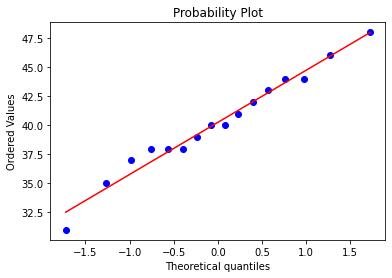

In [79]:
# example 10
data = [31, 35, 37, 38, 38, 38, 39, 40, 40, 41, 42, 43, 44, 44, 46, 48]
n = len(data)
s = np.std(data, ddof=1)
mu = 38

stats.probplot(data, plot=plt);

In [80]:
alpha = 0.05

mu_bar = np.mean(data)
se = stats.sem(data);
t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * se

ci = [mu_bar-interval, mu_bar+interval]
ci

[37.97673136750427, 42.52326863249573]

In [86]:
t_val = -(mu_bar - mu)/se
p_val = stats.t.cdf(t_val, df=n-1)
p_val

0.026050840503660362

In [89]:
# prob 6.2
# 1
1-stats.t.cdf(2.71, df=23)

0.006246031102300598

In [90]:
# 2
1-stats.t.cdf(3.335, df=8)

0.005153740203325929

In [96]:
# 3
stats.t.cdf(-2.110, df=17) + (1-stats.t.cdf(2.110,df=17))

0.04998212471210535

In [94]:
# 4
stats.t.cdf(2.262,df=9) - stats.t.cdf(-0.703,df=9) 

0.7250761144153214

In [99]:
# prob 6.4
# 모집단은 정규분포이다
n = 15
x_bar = 47
s = 9.4
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)

ci = [x_bar - t_alpha * s / np.sqrt(n), x_bar + t_alpha * s / np.sqrt(n) ]
ci

[41.79445350929237, 52.20554649070763]

In [100]:
# prob 6.6
n = 21
x_bar = 39
s = 5.1
alpha = 0.05

t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
ci = [x_bar - t_alpha*s/np.sqrt(n), x_bar + t_alpha*s/np.sqrt(n)]
ci


[36.67850783288408, 41.32149216711592]

In [111]:
# prob 6.8
# 1
n = 15
x_bar = 47
mu = 49
s = 9.4
alpha = 0.05

# H0 : mu = 49 / H1 : mu < 49

In [112]:
# 2
t_val = (x_bar - mu)/(s/np.sqrt(n))
t_val

-0.8240390098313652

In [113]:
# 3

stats.t.ppf(alpha, df=n-1)

-1.7613101357748564

In [114]:
# prob 6.10
n = 18
mu_0 = 4.1
s = 1.6
mu = 3.5
alpha = 0.05

t_val = (mu-mu_0)/(s/np.sqrt(n)); print(t_val)
t_alpha = stats.t.ppf(0.05, df=n-1); print(t_alpha)

-1.5909902576697308
-1.7396067260750676


In [115]:
# prob 6.12
# 1
# 모집단은 정규분포
n = 16
x_bar = 182
s_bar = 12
mu = 190
alpha = 0.05

t_val = (x_bar - mu) / (s/np.sqrt(n)) ; print(t_val)
t_alpha = stats.t.ppf(alpha, df=n-1) ; print(t_alpha)

-20.0
-1.7530503556925552


In [116]:
# 2
stats.t.cdf(t_val, df=n-1)

1.577596276745219e-12

In [119]:
# prob 6.14
mu = 12
x_bar = 15
s = 5
alpha = 0.05
n = 25

t_val = (15-12) / (s/np.sqrt(n)) ; print(t_val)
t_alpha = stats.t.ppf(1-alpha, df=n-1); print(t_alpha)
print(1-stats.t.cdf(t_val,df=n-1))

3.0
1.7108820799094275
0.003102868308262341


In [124]:
# prob 6.16
n = 10
x_bar = 73.2
s_bar = 2.74
mu = 70
alpha = 0.05

t_val = (73.2-mu) / (s_bar/np.sqrt(n))
stats.t.cdf(1-t_val, df=n-1)

0.012334029894364527

In [125]:
# prob 6.18
# 1
n = 25
x_bar = 64.8
s = 6.5
mu = 65

t_val = (mu-64.8) / s/np.sqrt(n)
stats.t.cdf(t_val, df=n-1)

0.5024295802615854

In [126]:
# 2
alpha = 0.05
t_alpha = stats.t.ppf(1-alpha/2, df=n-1)
interval = t_alpha * s / np.sqrt(n)
interval

2.683068130116427

In [128]:
# 3
alpha = 0.1
ci = [s * np.sqrt((n-1)/(stats.chi2.ppf(1-alpha/2,df=n-1))), s * np.sqrt((n-1)/(stats.chi2.ppf(alpha/2,df=n-1)))]
ci

[5.276897402767489, 8.556945883828943]

In [129]:
# 6.20
# 1
stats.chi2.ppf(0.9, df=12)

18.54934778670325

In [130]:
# 2
stats.chi2.ppf(0.1, 9)

4.168159008146107

In [131]:
# 3
stats.chi2.ppf(0.5, 22)

21.337044807672633

In [132]:
# 4
stats.chi2.ppf(0.05, 50)

34.76425168350175

In [138]:
# prob 6.22
mu = 12
x_bar = 15
s = 5
alpha = 0.05
n = 25
sigma = 3

chi2_val = (n-1)*np.power(sigma,2)/ np.power(s, 2) ; print(chi2_val)
print(stats.chi2.ppf(alpha, df=n-1))

8.64
13.848425027170224


In [146]:
# prob 6.24
# 1
n = 25
alpha = 0.05
ci = [106.8, 115.2]

# s * np.sqrt((n-1)/stats.chi2.ppf(alpha/2,df=n-1)) = 106.8
s = 106.8 / np.sqrt((n-1)/stats.chi2.ppf(1-alpha/2,df=n-1)); print(s)

131.55457592105623


In [148]:
# 2
sigma = 8
alpha = 0.05
chi2_val = (n-1) * np.power(10.17,2) / np.power(sigma,2)
stats.chi2.cdf(1-chi2_val, df=n-1)

0.0

In [149]:
# prob 6.26
alpha = 0.1
ci = [8.6, 15.3]
# 8.6 = s * np.sqrt((n-1)/stats.chi2.ppf(alpha/2, df=n-1))
# 15.3 = s * np.sqrt((n-1)/stats.chi2.ppf(alpha/2, df=n-1))
# s = 8.6 / np.sqrt((n-1)/stats.chi2.ppf(alpha/2, df=n-1))
# 15.3 = 8.6 / np.sqrt((n-1)/stats.chi2.ppf(alpha/2, df=n-1)) * np.sqrt((n-1)/stats.chi2.ppf(alpha/2, df=n-1))